In [1]:
import transporters.ptc_twiss.configuration as twiss_configuration_gen
import transporters.ptc_track.configuration as track_configuration_gen
import transporters.approximator.configuration as approximator_configuration_gen
import visualization.optics_parameter_visualisation as plotter
import data.grid_configuration as grid_configuration_module
import os
import matplotlib.pyplot as plt
import seaborn as sns
from data.parameters_names import ParametersNames as Parameters

Welcome to JupyROOT 6.18/04


In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
%cd ..
%cd ..

/home/rafalmucha/Pobrane/optic/optics_generator_python
/home/rafalmucha/Pobrane/optic


In [4]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2016"
xml_file_name = "configuration_reconst_beam1.xml"
serialized_approximator_file_name = "parametrization_6500GeV_0p4_185_reco.root"
approximator_name = "ip5_to_station_220_h_2_lhcb1"

In [5]:
s = 219.55
item_number = 2
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
twiss_configuration = twiss_configuration_gen.TwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number, s)

In [6]:
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = track_configuration_gen.TrackConfiguration.get_track_configuration_from_xml_file(path_to_xml_file, item_number)

In [7]:
path_to_approximator = os.path.join(path_to_project, folder_name, serialized_approximator_file_name)
approximator_configuration = approximator_configuration_gen.ApproximatorConfiguration(path_to_approximator, approximator_name)

In [8]:
x_mean = 0
sigma_x = 0
theta_x_mean = 190e-6
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.1
sigma_pt = 0.1

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 11

grid_configuration = grid_configuration_module.CanonicalCoordinatesGridConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)
grid_120_name = r"$\theta_x = 120\mu$rad "
particles = grid_configuration.generate_grid()

In [9]:
title_sufix = "2017_nominal; " + r"$\theta_x$=XA; $\xi$=0"
transporter1_name = "ptc_twiss; madx 5.05.02"
transporter2_name = "ptc_track"
transporter3_name = "approximator"

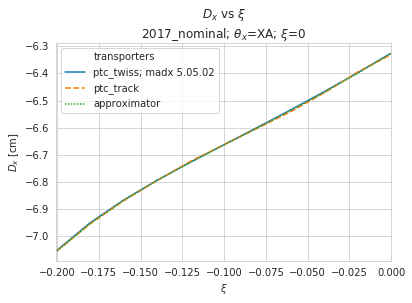

In [11]:
transporters = {
    transporter1_name: twiss_configuration,
    transporter2_name: track_configuration,
    transporter3_name: approximator_configuration
}

axes = plotter.plot_optical_functions(particles, transporters, Parameters.PT, Parameters.D_X, title_sufix=title_sufix)
# axes.set_ylim(-10.25, -8.25)
# axes.set_xticks(range(0, 151, 30))

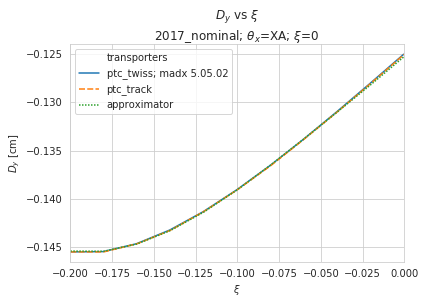

In [12]:
axes = plotter.plot_optical_functions(particles, transporters, Parameters.PT, Parameters.D_Y, title_sufix=title_sufix)

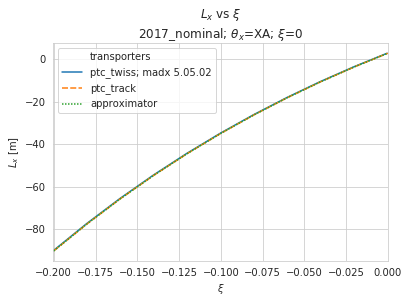

In [13]:
axes = plotter.plot_optical_functions(particles, transporters, Parameters.PT, Parameters.L_X, title_sufix=title_sufix)

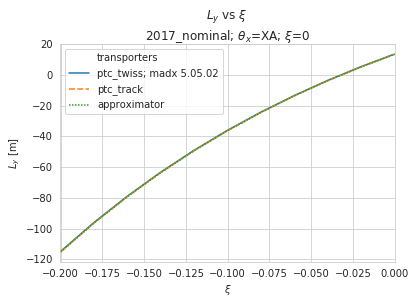

In [14]:
axes = plotter.plot_optical_functions(particles, transporters, Parameters.PT, Parameters.L_Y, title_sufix=title_sufix)

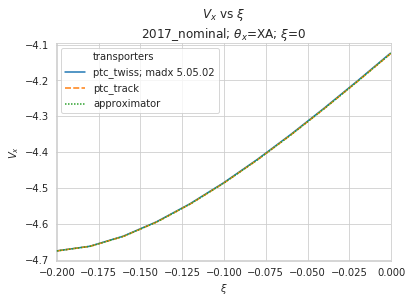

In [15]:
axes = plotter.plot_optical_functions(particles, transporters, Parameters.PT, Parameters.V_X, title_sufix=title_sufix)

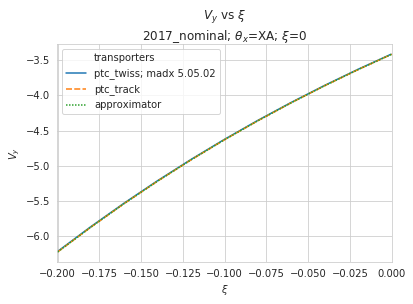

In [16]:
axes = plotter.plot_optical_functions(particles, transporters, Parameters.PT, Parameters.V_Y, title_sufix=title_sufix)